### Task2: Traditional ML Model

- Train a traditional ML model (e.g. k-NN, SVM, random forest) with any features
extracted from the audio

- Need to report how to implement the model clearly

- Need to report the testing result (not validation result) with confusion matrix,
top1 accuracy, and top3 accuracy

- Remember to utilize standardization (e.g. mean, std), pooling and normalization
to ensure consistent feature scales, reducing overfitting, and improving model
stability and performance during training

In [8]:
# training file path:

# testing file path:
testing_data_path = '<PUT THE PATH TO THE TESTING DATA HERE>'

In [9]:
import sklearn
import numpy as np
import os
import json
import librosa
import torchaudio
import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

import joblib

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



In [10]:
# load the json file
def load_json(json_file):
    with open(json_file) as f:
        data = json.load(f)
    return data

# get all "instrument_family_str" from dumpped 
instrument_family_str = joblib.load('instrument_family_str.pkl')

In [11]:
def feature_extraction(key, file_path):
    y, sr = librosa.load(file_path)

    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)

    # put all features into a list
    features = [spectral_contrast, mfcc]

    return features

In [12]:
# read the dumpped scaler
scaler_spectral_contrast = joblib.load('scaler_spectral_contrast.pkl')
scaler_mfcc = joblib.load('scaler_mfcc.pkl')

In [13]:
# get the knn model
knn = joblib.load('knn_model.pkl')

In [14]:
# test the model
test_data = load_json('nsynth-test/examples.json')
test_keys = list(test_data.keys())

test_features = []
for key in tqdm.tqdm(test_keys):
    file = 'nsynth-test/audio/' + key + '.wav'
    feature = feature_extraction(key, file)
    test_features.append(feature)

test_spectral_contrast_features = [f[0].flatten() for f in test_features]
test_mfcc_features = [f[1].flatten() for f in test_features]
# normalize
test_spectral_contrast_normalized = scaler_spectral_contrast.transform(test_spectral_contrast_features)
test_mfcc_normalized = scaler_mfcc.transform(test_mfcc_features)
test_features_combined = np.concatenate((test_spectral_contrast_normalized, test_mfcc_normalized), axis=1)

test_labels = []
for key in test_keys:
    test_labels.append(test_data[key]["instrument_family"])

# predict the labels of the test data
test_pred = knn.predict(test_features_combined)

# calculate the accuracy
accuracy = accuracy_score(test_labels, test_pred)
print(accuracy)

# precision, recall, f1-score
print(classification_report(test_labels, test_pred))
# confusion matrix
print(confusion_matrix(test_labels, test_pred))

100%|██████████| 4096/4096 [01:11<00:00, 57.15it/s]


0.626953125
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       843
           1       0.60      0.77      0.67       269
           2       0.67      0.75      0.70       180
           3       0.52      0.39      0.45       652
           4       0.62      0.67      0.65       766
           5       0.48      0.62      0.54       202
           6       0.77      0.56      0.65       502
           7       0.80      0.41      0.54       235
           8       0.86      0.95      0.90       306
           9       0.00      0.00      0.00         0
          10       0.57      0.71      0.63       141

    accuracy                           0.63      4096
   macro avg       0.60      0.59      0.58      4096
weighted avg       0.65      0.63      0.63      4096

[[558   2  14  71  95  46  15   1   7   9  25]
 [ 55 208   2   0   1   0   0   1   2   0   0]
 [  6   5 135   0   0   0  15  14   0   0   5]
 [ 97   0   6 256 181  57  44   4 

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


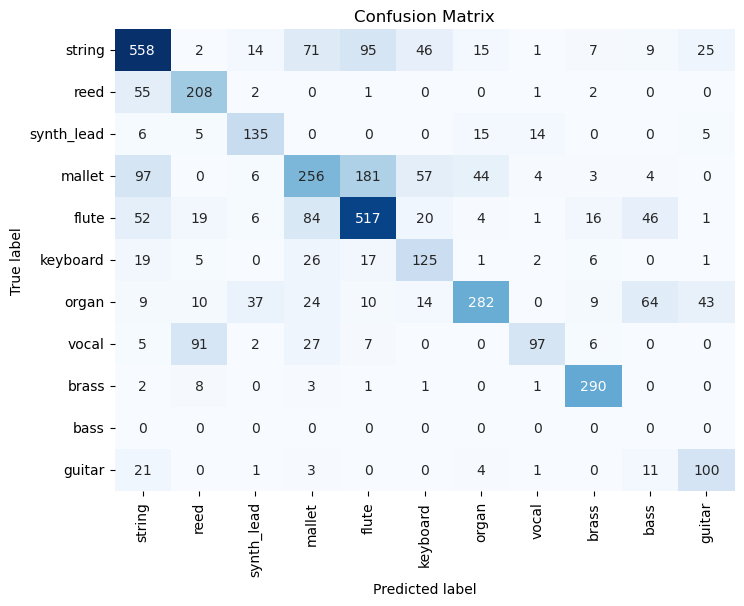

In [15]:
# Assume val_labels and val_pred are your true and predicted labels
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_pred)

# Plot confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=instrument_family_str,
            yticklabels=instrument_family_str)
            # xticklabels=['Predicted Class 0', 'Predicted Class 1'], 
            # yticklabels=['Actual Class 0', 'Actual Class 1'])

# Add labels and title
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()



In [16]:
# top 1 accuracy
top1 = 0
for i in range(len(test_labels)):
    if test_labels[i] == test_pred[i]:
        top1 += 1
top1 /= len(test_labels)
print(top1)

# # top 3 accuracy
# top3 = 0
# for i in range(len(test_labels)):
#     if test_labels[i] in knn.classes_[np.argsort(knn.predict_proba(test_features_combined)[i])[-3:]]:
#         top3 += 1
# top3 /= len(test_labels)
# print(top3)
# It runs for 25 minutes but still not finished. I will stop it here.
# probably is because 

0.626953125
